In [50]:
import numpy as np
import matplotlib.pyplot as plt
from utils import plot_mean_std_shaded

In [71]:
# read csv
data = np.genfromtxt('./results/AR.csv', delimiter=',', skip_header=1, skip_footer=1)

In [72]:
data[:, 0]

array([1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2.])

In [73]:
data.shape

(15, 12)

In [74]:
z = np.mean(data[:][:, 2::2], axis=-1)
# z_error = np.std(data[:][:, 3::2], axis=-1) / np.sqrt(len(data[:]))
z_error = np.sqrt(np.sum(data[:][:, 3::2]**2, axis=-1) / len(data[:][:, 3::2]))
n = data[:][:, 0]
latent = data[:][:, 1]

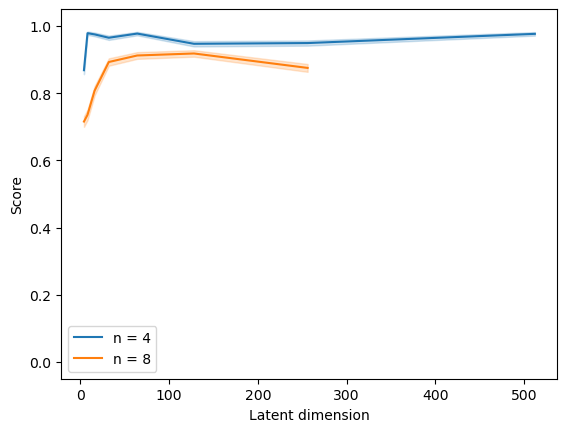

In [75]:
for ind, i in enumerate(np.unique(n).astype(int)):
    plot_mean_std_shaded(latent[n == i], z[n == i], z_error[n == i], color=f'C{ind}', label=f'n = {4 * i}')
    
plt.xlabel('Latent dimension')
plt.ylabel('Score')
plt.ylim(-0.05, 1.05)
# plt.yscale('log')
plt.legend()
plt.show()

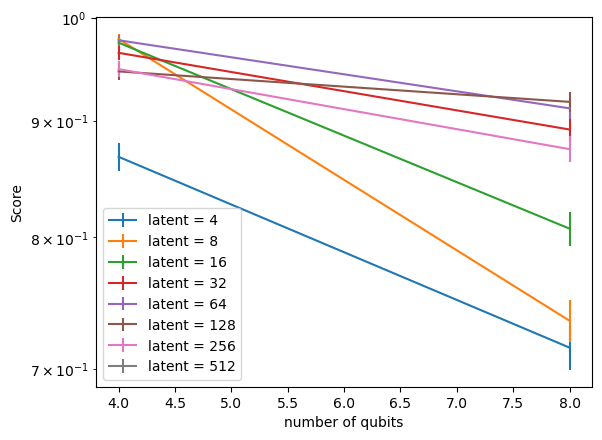

In [76]:
for i in np.unique(latent).astype(int):
    plt.errorbar(4 * n[latent == i], z[latent == i], yerr=z_error[latent == i], label=f'latent = {i}')
    
plt.xlabel('number of qubits')
plt.ylabel('Score')
plt.yscale('log')
plt.legend()
plt.show()